# Exercises - Risk Metrics

## 1. Risk Metrics of a Stock

This problem uses data from `data/spx_returns_weekly.xlsx`.

Choose any stock to evaluate below.

In [1]:
import sys
sys.path.append('..')

import warnings
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from utils import *

warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'

### 1.1 Return Moments

Report the moments of the returns. Annualize the mean and volatility.

- mean

- volatility

- skewness

- (excess) kurtosis

Note that the pandas function for kurtosis already reports excess kurtosis.

In [2]:
data = pd.read_excel("../data/spx_returns_weekly.xlsx", sheet_name = "s&p500 rets").set_index("date")
data.head()

,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA
date,,,,,,,,,,,,,,,,,,,,,
2015-01-09,0.000740,0.024514,0.006681,0.010599,0.010581,-0.006912,-0.014763,-0.061514,0.015247,-0.021166,...,-0.007094,0.004489,0.011354,0.014705,0.001663,-0.007864,-0.071168,0.015343,0.049916,0.040165
2015-01-16,-0.057649,-0.053745,-0.010497,0.002370,-0.009913,-0.001531,-0.018825,-0.023352,0.000118,-0.024369,...,0.003522,-0.018548,0.003013,-0.013821,0.023218,-0.010640,-0.025443,-0.008421,-0.010236,0.029426
2015-01-23,0.014640,0.065950,-0.014160,0.002700,0.003713,0.032483,0.015274,0.003985,0.026960,0.023571,...,-0.022367,-0.015711,-0.016109,-0.006668,0.019987,-0.002524,0.020307,0.023193,-0.000171,0.015438
2015-01-30,-0.026799,0.036997,0.020519,-0.024242,-0.058171,-0.053065,-0.044119,-0.025903,-0.049741,-0.071920,...,-0.027416,0.001620,-0.005269,0.013287,-0.006089,-0.038178,-0.030427,-0.024691,-0.041716,-0.008671
2015-02-06,0.041567,0.019114,0.016533,0.035190,0.049030,0.034365,0.055656,0.019943,0.047376,0.056754,...,0.033666,0.036721,-0.027340,-0.011558,-0.048496,0.054550,0.031968,0.022828,0.036128,0.044213


In [3]:
mean, std, sharpe = Calc_MeanStdSharpe_Stock(data, 52)
max_std_idx = std.idxmax()
min_std_idx = std.idxmin()

print(f"Max std at: {max_std_idx} ({std.loc[max_std_idx]:.4f})")
print(f"Min std at: {min_std_idx} ({std.loc[min_std_idx]:.4f})")

Max std at: ENPH (0.8251)
Min std at: JNJ (0.1693)


In [4]:
# Most Volatile
mean, std, sharpe = Calc_MeanStdSharpe_Stock(data[max_std_idx], 52)
skew, kurt = Calc_SkewKurt(data[max_std_idx])

print(f"Mean ({max_std_idx}): {mean}")
print(f"Volatility ({max_std_idx}): {std}")
print(f"Skewness ({max_std_idx}): {skew}")
print(f"Kurtosis ({max_std_idx}): {kurt}")
print("="*30)

# Least Volatile
mean, std, sharpe = Calc_MeanStdSharpe_Stock(data[min_std_idx], 52)
skew, kurt = Calc_SkewKurt(data[min_std_idx])

print(f"Mean ({min_std_idx}): {mean}")
print(f"Volatility ({min_std_idx}): {std}")
print(f"Skewness ({min_std_idx}): {skew}")
print(f"Kurtosis ({min_std_idx}): {kurt}")

Mean (ENPH): 0.4277794761995221
Volatility (ENPH): 0.8251114920672257
Skewness (ENPH): 0.70212803065009
Kurtosis (ENPH): 2.7842174228162495
Mean (JNJ): 0.07815163556960726
Volatility (JNJ): 0.1693237860905295
Skewness (JNJ): -0.18687076644522765
Kurtosis (JNJ): 1.9164590692143033


### 1.2 Maximum Drawdown

Report the maximum drawdown for each return series.

If we resampled this data to weekly and recalculated the maximum drawdown, do you think it would be larger or smaller (in magnitude)?

In [5]:
def Calc_MaxDrawdown(returns) -> tuple[float, list[float]]:
    """
    Args:
        returns (pd.DataFrame, pd.Series):

    Returns:
        Tuple: (Max Drawdown, Drawdown (Time Series))
    """
    cumulative = (1 + returns).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    maxDrawdown = drawdown.min()
    return (maxDrawdown, drawdown)

maxDrawdown_maxSTD, drawdown_maxSTD = Calc_MaxDrawdown(data[max_std_idx])
maxDrawdown_minSTD, drawdown_minSTD = Calc_MaxDrawdown(data[min_std_idx])

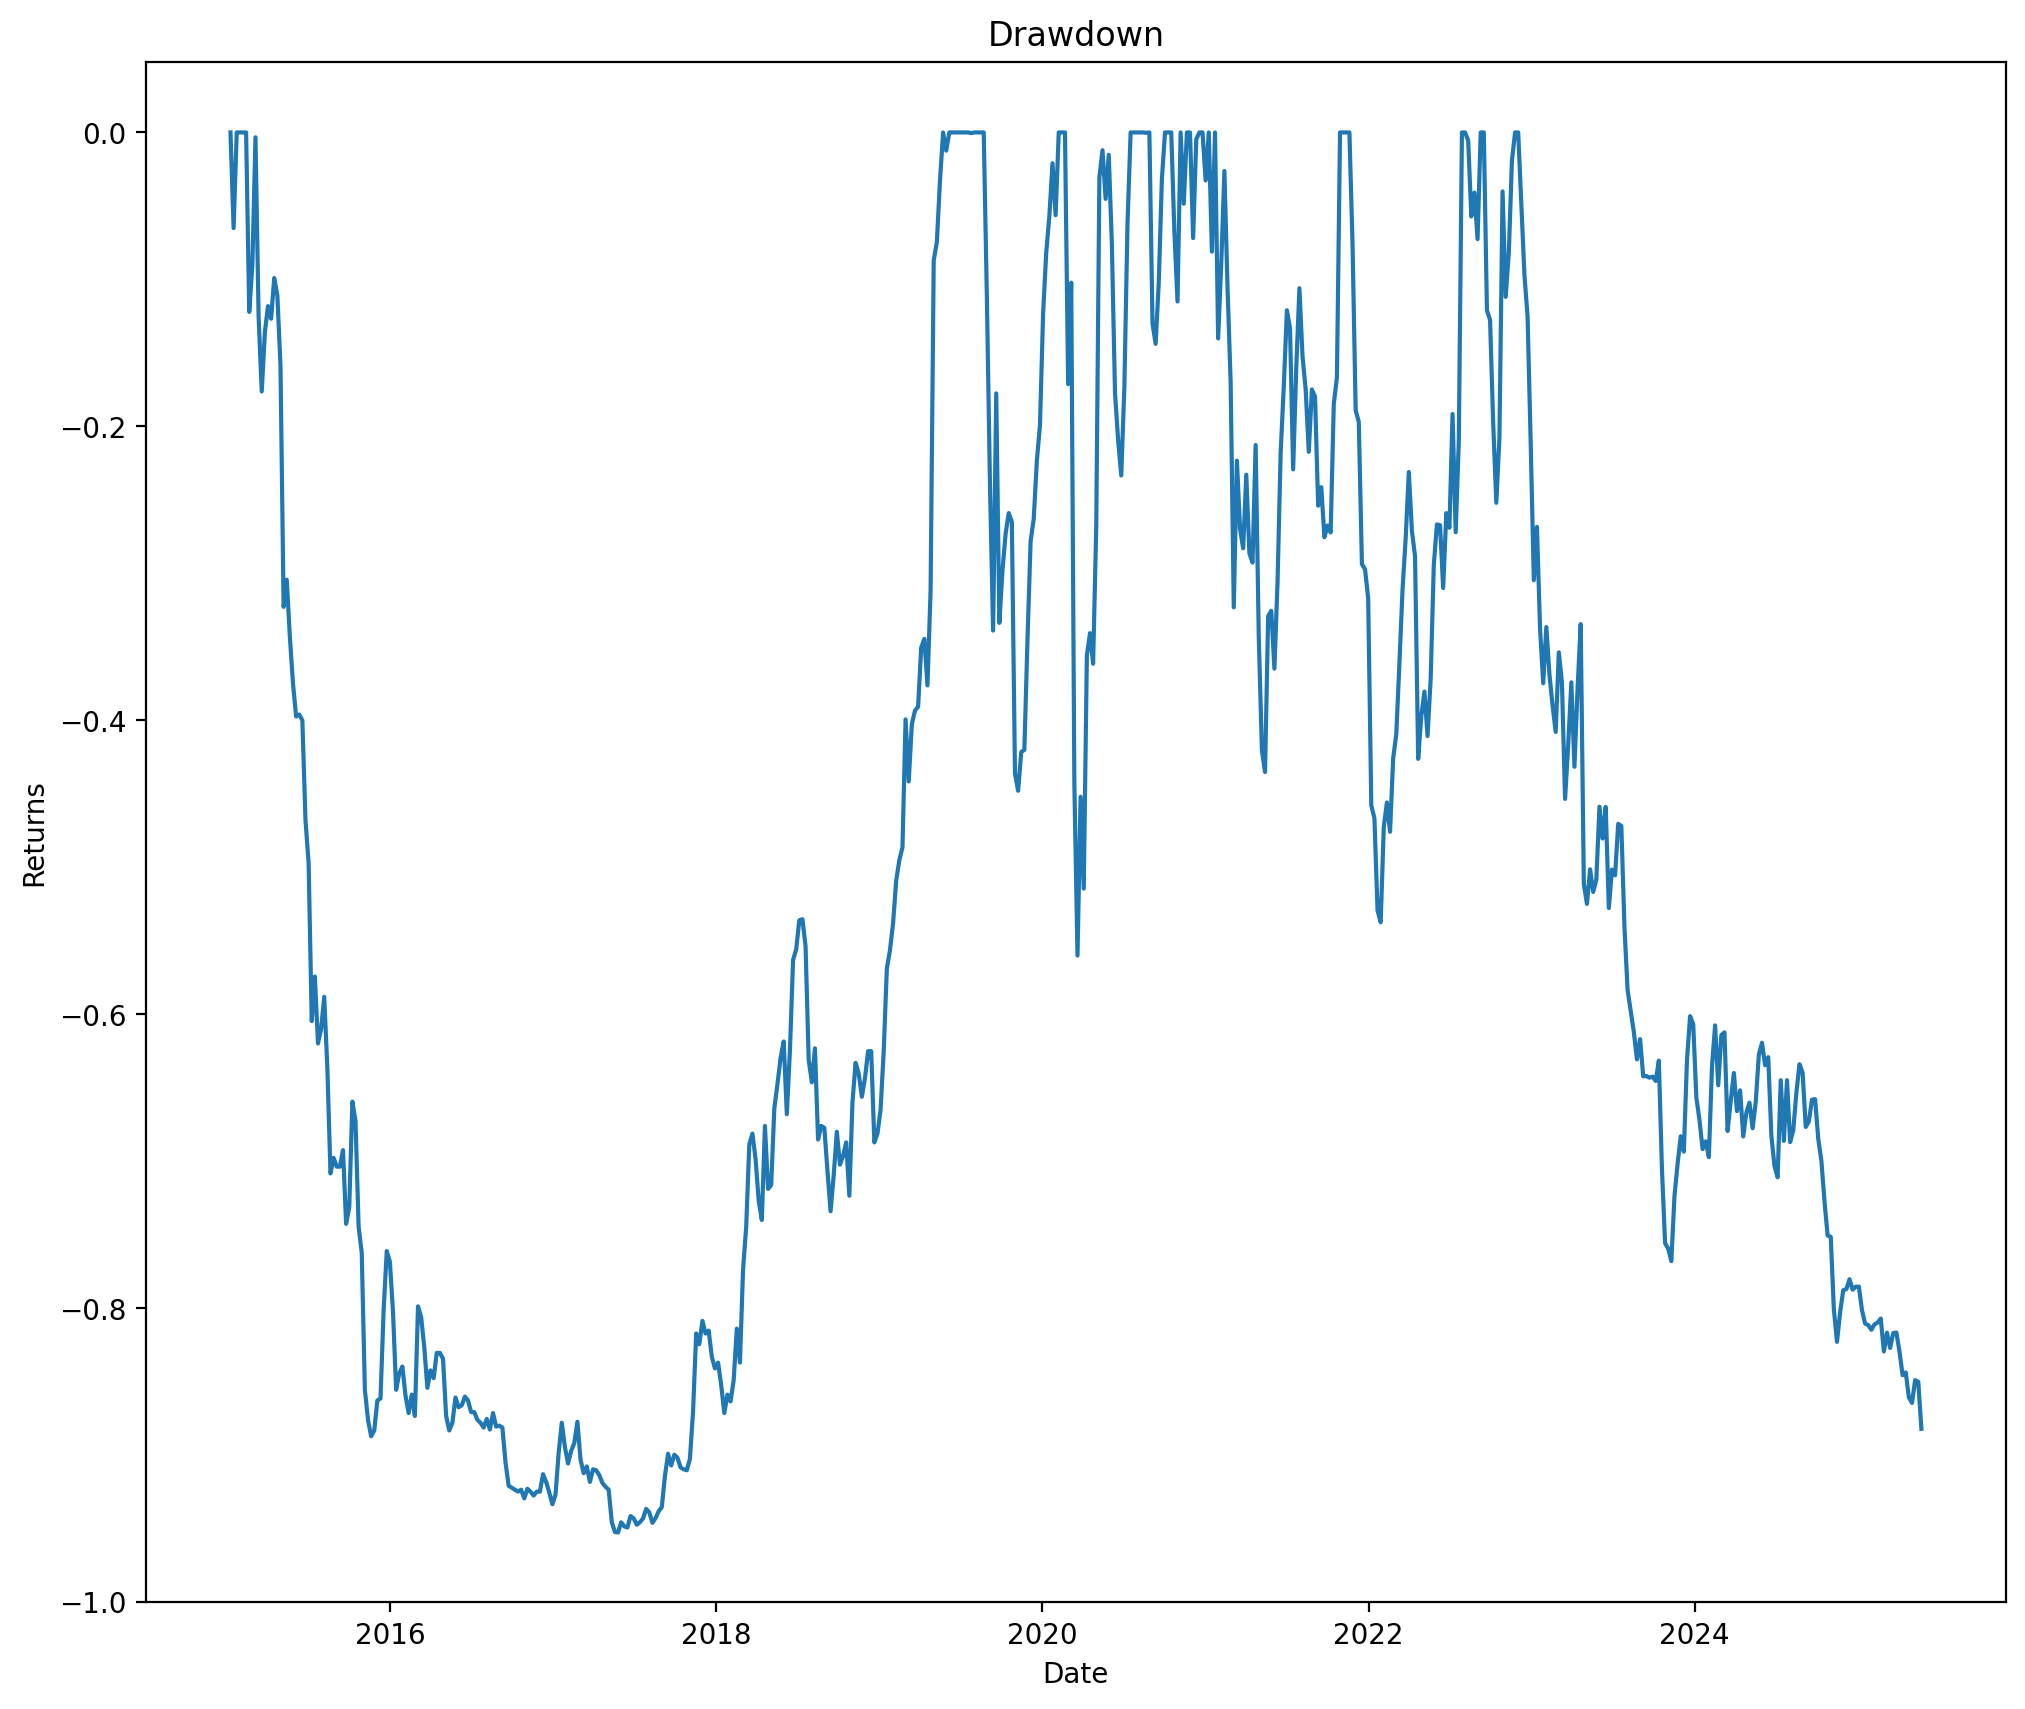

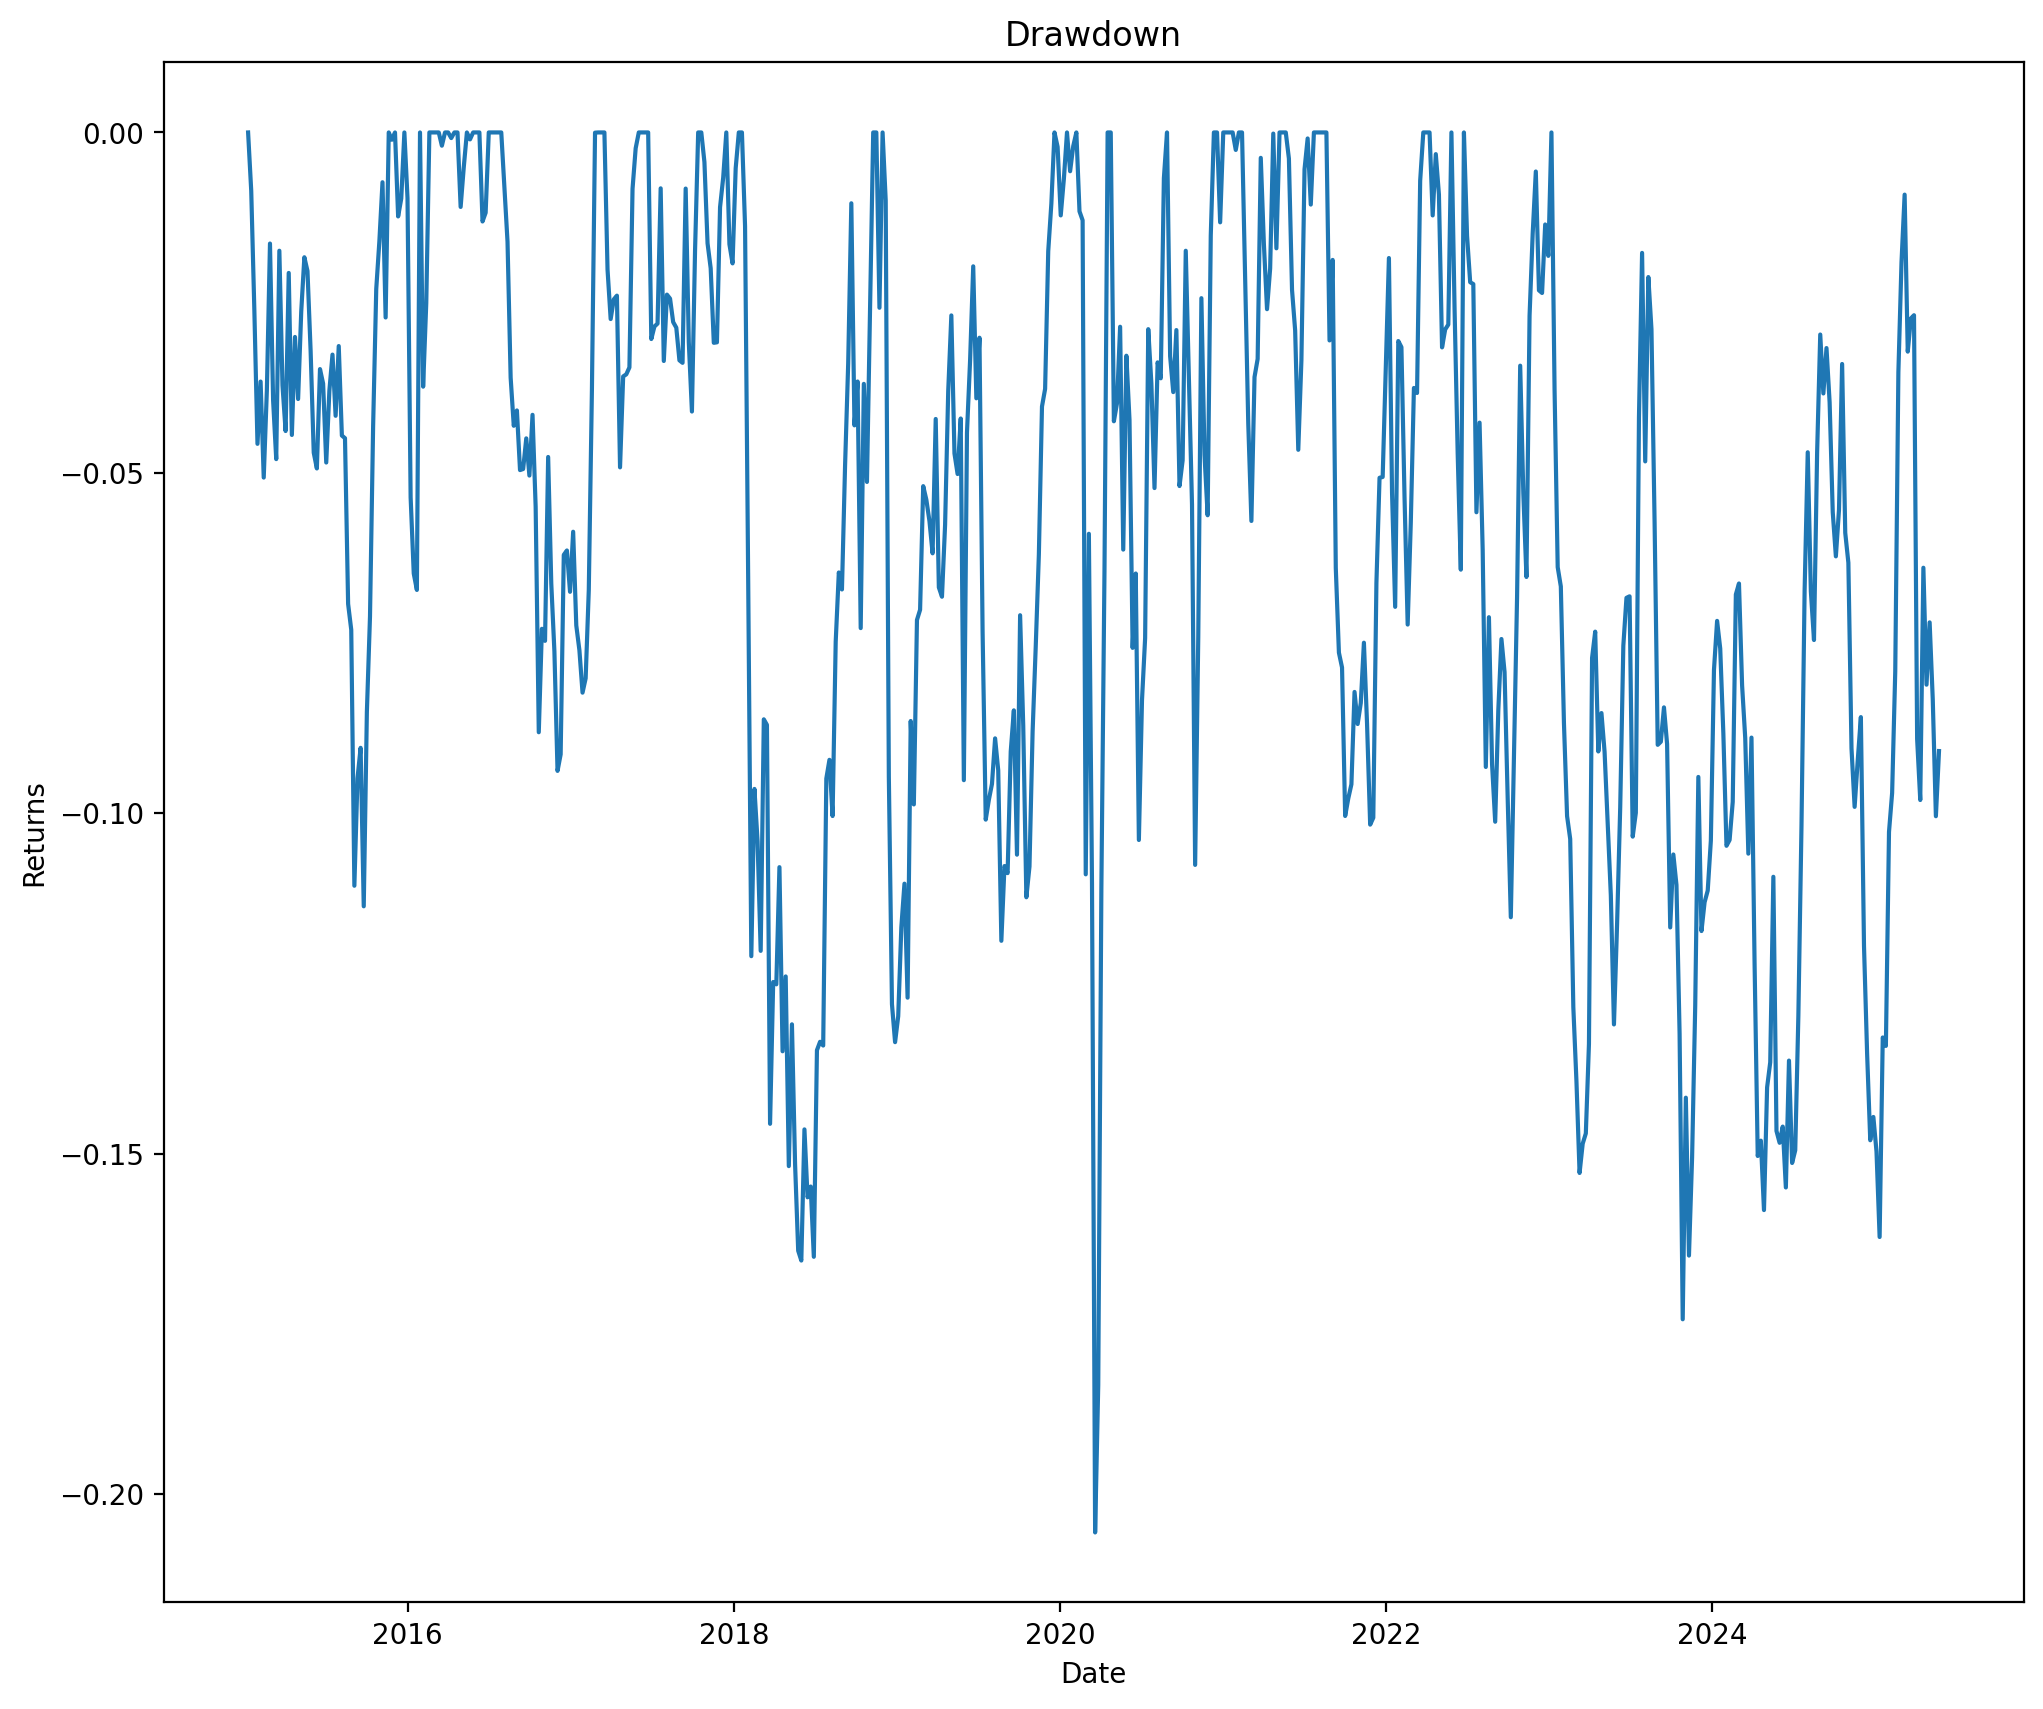

In [6]:
Plot_Drawdown(data[max_std_idx])
Plot_Drawdown(data[min_std_idx])

### 1.3 Quantiles

Report the quantiles of the series. Use `.describe()` for a useful summary.

- Report the 5th quantile scaled by standard deviation.

- How much sampling error is in the mean return? Is this likely to cause much sampling error in the quantile estimation?

In [7]:
print(data[max_std_idx].describe())
print(data[min_std_idx].describe())

count    542.000000
mean       0.008227
std        0.114422
min       -0.391667
25%       -0.055969
50%        0.002054
75%        0.063613
max        0.588542
Name: ENPH, dtype: float64
count    542.000000
mean       0.001503
std        0.023481
min       -0.107231
25%       -0.012819
50%        0.001824
75%        0.015740
max        0.089396
Name: JNJ, dtype: float64


In [8]:
# Most Volatile
q5_scaled = data[max_std_idx].quantile(0.05) / data[max_std_idx].std()
print(f"Scaled 5th quantile {max_std_idx}: {q5_scaled}")
print(f"Skewness {max_std_idx}: {data[max_std_idx].skew()}")
print(f"Kurtosis {max_std_idx}: {data[max_std_idx].kurt()}")
print("="*30)
# Least Volatile
q5_scaled = data[min_std_idx].quantile(0.05) / data[min_std_idx].std()
print(f"Scaled 5th quantile {min_std_idx}: {q5_scaled}")
print(f"Skewness {min_std_idx}: {data[min_std_idx].skew()}")
print(f"Kurtosis {min_std_idx}: {data[min_std_idx].kurt()}")

Scaled 5th quantile ENPH: -1.4506917956455738
Skewness ENPH: 0.70212803065009
Kurtosis ENPH: 2.7842174228162495
Scaled 5th quantile JNJ: -1.4884417535911532
Skewness JNJ: -0.18687076644522765
Kurtosis JNJ: 1.9164590692143033


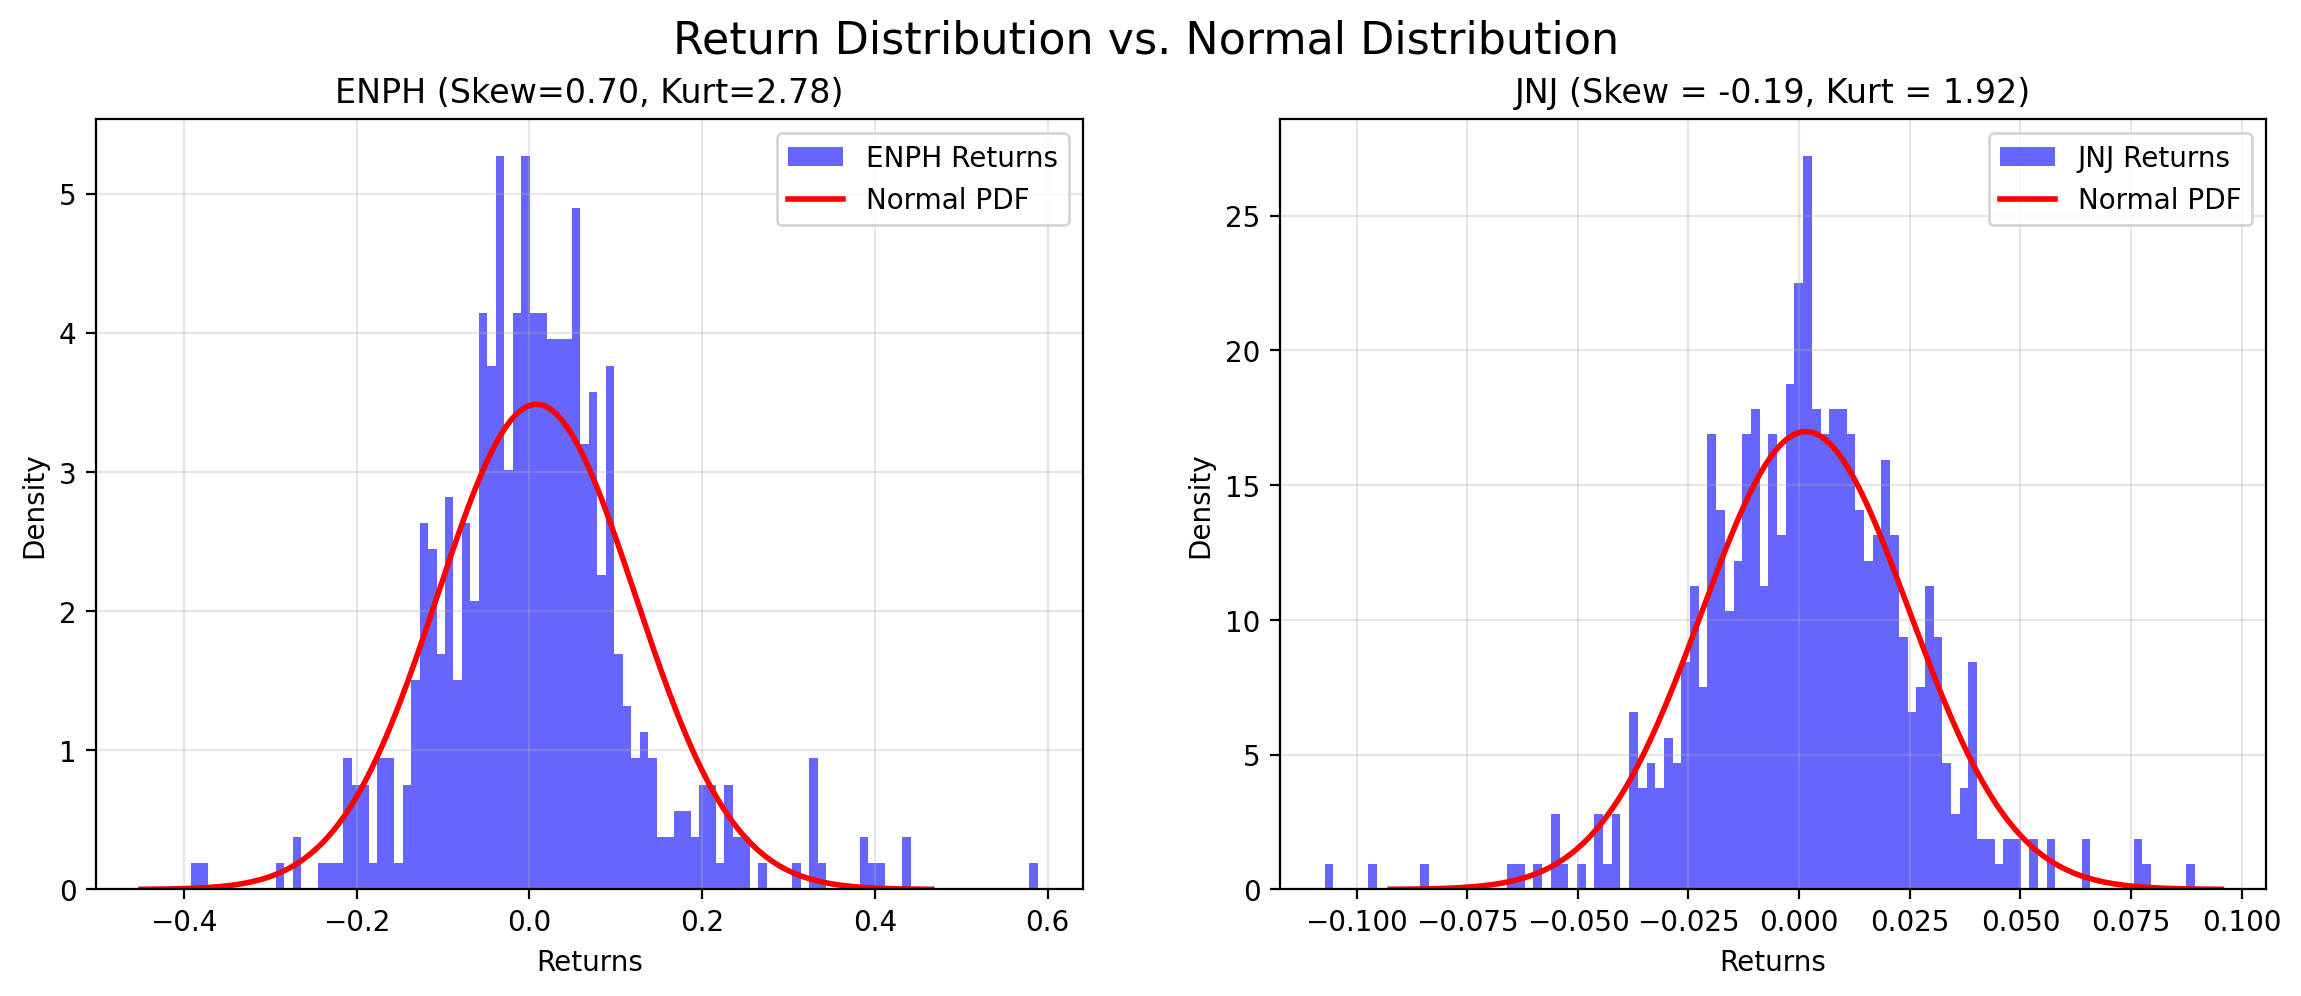

In [9]:
ticker1 = 'ENPH'
ticker2 = 'JNJ'

stats_dict = {}
for ticker in [ticker1, ticker2]:
    stats_dict[ticker] = {
        'mean': data[ticker].mean(),
        'std': data[ticker].std(),
        'skew': data[ticker].skew(),
        'kurt': data[ticker].kurt()
    }

np.random.seed(42)
normal_data = {}
for ticker in [ticker1, ticker2]:
    normal_data[ticker] = np.random.normal(
        loc=stats_dict[ticker]['mean'],
        scale=stats_dict[ticker]['std'],
        size=len(data[ticker])
    )

# --- Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Return Distribution vs. Normal Distribution', fontsize=16)

# Ticker 1 Plot
ticker = ticker1
ax = axes[0]
mean, std, skew, kurt = stats_dict[ticker].values()

# Plot histogram of actual returns
ax.hist(data[ticker], bins=100, density=True, alpha=0.6, label=f'{ticker} Returns', color='blue')

# Plot PDF curve of the normal distribution
x = np.linspace(mean - 4*std, mean + 4*std, 200)
pdf = stats.norm.pdf(x, mean, std)
ax.plot(x, pdf, 'r-', lw=2, label='Normal PDF')

ax.set_title(f'{ticker} (Skew={skew:.2f}, Kurt={kurt:.2f})')
ax.set_xlabel('Returns')
ax.set_ylabel('Density')
ax.legend()
ax.grid(True, alpha=0.3)

# Ticker 2 Plot
ticker = ticker2
ax = axes[1]
mean, std, skew, kurt = stats_dict[ticker].values()

# Plot histogram of actual returns
ax.hist(data[ticker], bins=100, density=True, alpha=0.6, label=f'{ticker} Returns', color='blue')

x = np.linspace(mean - 4*std, mean + 4*std, 200)
pdf = stats.norm.pdf(x, mean, std)
ax.plot(x, pdf, 'r-', lw = 2, label = 'Normal PDF')

ax.set_title(f'{ticker} (Skew = {skew:.2f}, Kurt = {kurt:.2f})')
ax.set_xlabel('Returns')
ax.set_ylabel('Density')
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()

---

# 2. Time Aggregation

Use the data in `../data/risk_etf_data.xlsx`.

Use the price series to calculate **monthly** returns. (You may find `df.resample('M').last()` helpful.)

In [10]:
data_returns = pd.read_excel("../data/risk_etf_data.xlsx", sheet_name = "total returns").set_index("Date")
data_price = pd.read_excel("../data/risk_etf_data.xlsx", sheet_name = "prices").set_index("Date")
data_returns.head()

,SPY,VEA,UPRO,GLD,USO,FXE,BTC,HYG,IEF,TIP,SHV
Date,,,,,,,,,,,
2017-01-04,0.005949,0.012238,0.017834,0.003530,0.012238,0.009314,0.106233,0.005408,0.001145,0.002207,-0.000090
2017-01-05,-0.000794,0.008866,-0.003057,0.015515,0.010363,0.010896,-0.122410,-0.001488,0.006484,0.003434,-0.000091
2017-01-06,0.003578,-0.003995,0.011323,-0.007373,-0.001709,-0.006700,-0.109711,-0.000229,-0.004547,-0.004125,0.000272
2017-01-09,-0.003301,-0.002406,-0.009447,0.008233,-0.031678,0.003617,0.000695,-0.000230,0.003807,0.001587,0.000181
2017-01-10,0.000000,0.001072,-0.001648,0.004260,-0.021220,-0.001072,0.005373,0.000116,-0.000474,0.000792,-0.000091


In [11]:
data_price = data_price.resample("M").last()
data_price.head()

,SPY,VEA,UPRO,GLD,USO,FXE,BTC,HYG,IEF,TIP,SHV
Date,,,,,,,,,,,
2017-01-31,198.111221,29.360121,13.735440,115.550003,90.559998,100.334343,970.403015,56.246895,87.720726,88.951813,92.022125
2017-02-28,205.895370,29.670158,15.371301,119.230003,91.599998,98.391022,1179.969971,57.108452,88.355484,89.318016,92.063873
2017-03-31,206.152725,30.577597,15.337751,118.720001,85.120003,98.994133,1071.790039,57.026585,88.426666,89.318016,92.075600
2017-04-30,208.199020,31.254507,15.762691,120.769997,81.919998,101.014053,1316.479980,57.491787,89.407143,89.719772,92.073006
2017-05-31,211.137314,32.320446,16.345783,120.620003,79.680000,104.125229,2286.409912,58.084778,90.146324,89.683800,92.124008


## 2.1 Bitcoin and Measuring Covariation Risk

People often say that bitcoin has disappointed by being highly correlated to SPY.

Report the correlation between BTC and SPY for both daily and monthly returns.

What do you conclude?

In [12]:
print(f"Daily Correlation between BTC and SPY: {data_returns["BTC"].corr(data_returns["SPY"])}")
print(f"Monthly Correlation between BTC and SPY: {data_price["BTC"].pct_change().corr(data_price["SPY"].pct_change())}")

Daily Correlation between BTC and SPY: 0.250931139363592
Monthly Correlation between BTC and SPY: 0.3422006390976652


## 2.2 Betas

For each series, calculate its beta to SPY.

- Estimate the regression with an intercept (alpha) but no need to report it.

How do these betas compare to the daily return betas seen in the note?

In [16]:
y = data_returns["BTC"]
x = data_returns["SPY"]
Beta, treynorRatio, info_Ratio, Rsquared, trackingError, Model = Calc_Beta_TreynorRatio_InfoRatio_RSquared_TrackingError(y, x, 12)
print(f"Alpha of BTC to SPY: {Model.params["const"]}")
print(f"Beta of BTC to SPY: {Beta}")

Alpha of BTC to SPY: 0.0025824784640037794
Beta of BTC to SPY: 0.9295894983585503


## 2.3 Time Scaling to Higher Moments

Report the skewness and kurtosis for the monthly returns.

How do these compare to the daily skewness and kurtosis measures?

What do you conclude?

In [19]:
skew, kurt = Calc_SkewKurt(data_returns)
result = pd.DataFrame({
    "Skewness": skew,
    "Kurtosis": kurt
}, index = data_returns.columns)
result

,Skewness,Kurtosis
SPY,-0.304538,14.240551
VEA,-0.860444,16.119564
UPRO,-0.380947,14.986276
GLD,-0.150398,2.699579
USO,-1.275582,16.301079
FXE,0.162892,1.349047
BTC,0.027145,6.154909
HYG,0.130018,26.422654
IEF,0.196624,3.196215
TIP,0.363154,14.856035
